In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
class LogReg():

    def __init__(self,X,Y,alpha,epochs):
        self.X = X
        self.Y = Y
        self.alpha = alpha
        self.epochs = epochs

    def add_bias(self,X):
        X0 = np.ones((X.shape[0],1))
        X = np.concatenate((X0,X),axis=1)
        # print(f"Bias added {X.shape}")
        return X

    def init_weights(self):
        self.W = np.zeros((self.X.shape[1]))
        #return self.W

    def sigmoid(self,X):
        #Z = X@(self.W).T
        H = 1/(1+np.exp(-X))
        return H

    def calculate_cost(self):
        self.cost = -(self.Y.T@np.log(self.H)+(1-self.Y).T@np.log(1-self.H))/self.Y.shape[0]
        return self.cost
    
    def fit(self):
        self.X = self.add_bias(self.X)
        self.init_weights()
        #print(self.X.shape)
        for i in range(0,self.epochs):
            self.Z = self.X@(self.W).T
            self.H = self.sigmoid(self.Z)
            grad = (self.H-self.Y).T@ self.X
            self.W = self.W-(self.alpha)*grad
            if i%10000==0:
                pass
                #print(self.calculate_cost())
        return self.W
    
    def predict_proba(self,Xpred):
        Xpred = self.add_bias(Xpred)
        H = Xpred@(self.W).T
        pred = self.sigmoid(H)
        return pred#, 1-pred
    
    def predict(self,Xpred):
        pred = self.predict_proba(Xpred)
        return np.where(pred>0.5,1,0)

### NOTE
* np.dot seems to do matrix multiplication for N dimensiona array and dot product for 1D array. 
* Dimensions of weights should be similar to Y. i.e. if Y is (100,) weights should be (X.shape(1)) not  (X.shape(1),1). Cost function became (100,100) as Y was (100,) and H was (100,1) 
* Nan Cost: log component causes it?

## Iris Dataset
Lets select just petal with and try classifying our dataset.

In [13]:
# Iris Dataset 
from sklearn import datasets
iris = datasets.load_iris()
Y = (iris["target"] == 2).astype(np.int) 
X = iris["data"][:, 3:] # petal width


In [16]:
lr = LogReg(X,Y,0.01,100)
w = lr.fit()
prediction = lr.predict(X)

In [17]:
sk_lr = LogisticRegression(fit_intercept = True, C = 1e15)
sk_lr.fit(X, Y)
sk_Pred = sk_lr.predict(X)
print("-------------------")
print('Intercepts for my implementation')
print(w)
print('Intercepts for sklearn')
print(sk_lr.intercept_, sk_lr.coef_)
print("-------------------")
print('Weights for my implementation')
print(metrics.confusion_matrix(sk_Pred,Y))
print('Weights for sklearn')
print(confusion_matrix(prediction, Y))
print("-------------------")

-------------------
Intercepts for my implementation
[-5.91762714  3.64120217]
Intercepts for sklearn
[-21.12560671] [[12.94748623]]
-------------------
Weights for my implementation
[[98  4]
 [ 2 46]]
Weights for sklearn
[[98  4]
 [ 2 46]]
-------------------


### Interpretation
Even though the weights are differents, the confusion matrix look same. To dig deeper lets plot the decision boundary.


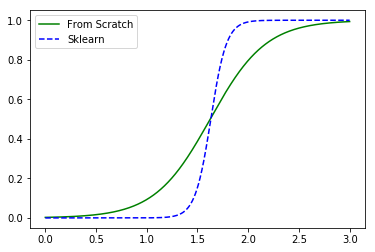

In [18]:
#print(np.max(X),np.min(X)) # find the spread of X
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)
y_proba_sk = sk_lr.predict_proba(X_new)
y_proba.shape
plt.plot(X_new, y_proba, "g-")
plt.plot(X_new, y_proba_sk[:,1], "b--")
plt.legend(['From Scratch', 'Sklearn'])

Sklearn is fit well, hence has a steeper decision boundary. For a threshold of 0.5 both implementations might be giving same results. But if I tweak the thresholds my implementation may have worse results than sklearn.

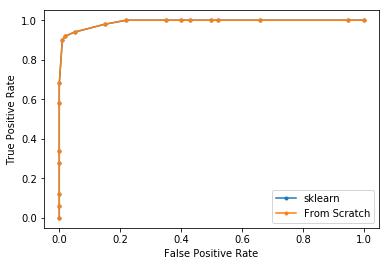

In [19]:
# get roc for sklearn
sk_lr_probs = sk_lr.predict_proba(X)
sk_lr_probs = sk_lr_probs[:, 1]
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, sk_lr_probs)

# get roc for my implementation
lr_probs = lr.predict_proba(X)
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='sklearn')
plt.plot(lr_fpr, lr_tpr, marker='.', label='From Scratch')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

May be this was an easy and seperated class and hence we dont see a change in roc curve. Lets try to use the other two classes.

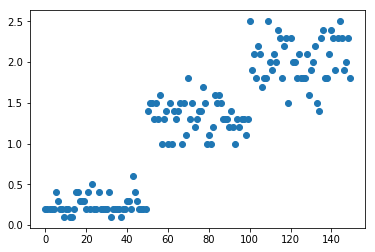

In [20]:
plt.scatter(np.arange(0,150), X)

Lets consider the 2nd and third classes

In [21]:
iris = pd.read_csv('./data/iris.csv')
iris = iris[~(iris['species']=='setosa')].reset_index(drop= True)
Y = (iris["species"] == 'versicolor').astype(np.int) 
X = np.array(iris['petal_width']).reshape(-1,1)

-------------------
Intercepts for my implementation
[ 4.70309187 -2.92168113]
Intercepts for sklearn
[21.12335847] [[-12.94606599]]
-------------------
Weights for my implementation
[[46  2]
 [ 4 48]]
Weights for sklearn
[[46  2]
 [ 4 48]]
-------------------


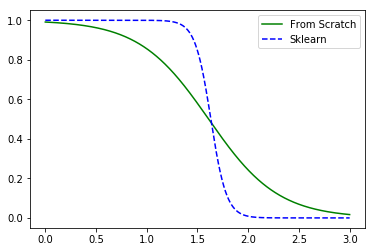

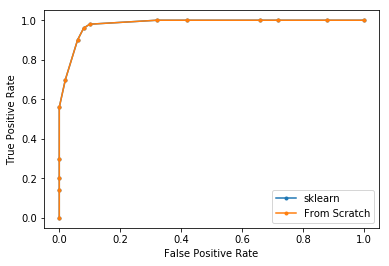

In [23]:
lr = LogReg(X,Y,0.01,100)
w = lr.fit()
prediction = lr.predict(X)
sk_lr = LogisticRegression(fit_intercept = True, C = 1e15)
sk_lr.fit(X, Y)
sk_Pred = sk_lr.predict(X)
print("-------------------")
print('Intercepts for my implementation')
print(w)
print('Intercepts for sklearn')
print(sk_lr.intercept_, sk_lr.coef_)
print("-------------------")
print('Weights for my implementation')
print(metrics.confusion_matrix(sk_Pred,Y))
print('Weights for sklearn')
print(confusion_matrix(prediction, Y))
print("-------------------")

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)
y_proba_sk = sk_lr.predict_proba(X_new)
y_proba.shape
plt.plot(X_new, y_proba, "g-")
plt.plot(X_new, y_proba_sk[:,1], "b--")
plt.legend(['From Scratch', 'Sklearn'])
plt.show()

# get roc for sklearn
sk_lr_probs = sk_lr.predict_proba(X)
sk_lr_probs = sk_lr_probs[:, 1]
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, sk_lr_probs)

# get roc for my implementation
lr_probs = lr.predict_proba(X)
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='sklearn')
plt.plot(lr_fpr, lr_tpr, marker='.', label='From Scratch')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Even in this case ROC curve is matching in both cases. But if we compare it with previous case, the decision boundary is tighter. 
So, when implementing gradient descent, if we have nicely seperated sample, there might exist multiple weights which seperate the sample well. How to get a decision boundary that demarcates our sample the best? 

Lets see if we can classify the second class. Thats difficult with just one feature. Hence we might have to go for more as seen below.

-------------------
Intercepts for my implementation
[-1.10427891  0.33380796]
Intercepts for sklearn
[-1.10427858] [[0.33380778]]
-------------------
Weights for my implementation
[[100  50]
 [  0   0]]
Weights for sklearn
[[100  50]
 [  0   0]]
-------------------


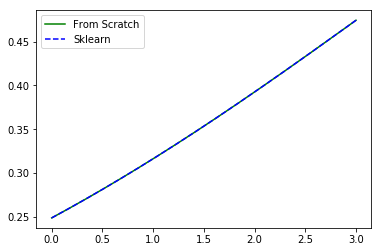

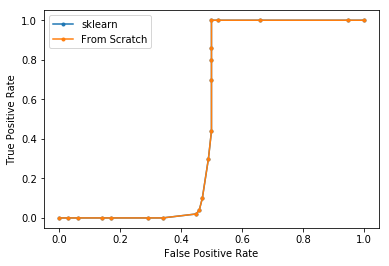

In [162]:
iris = datasets.load_iris()
Y = (iris["target"] == 1).astype(np.int) 
X = iris["data"][:, 3:] # petal width

lr = LogReg(X,Y,0.05,10000)
w = lr.fit()
prediction = lr.predict(X)
sk_lr = LogisticRegression(fit_intercept = True, C = 1e15)
sk_lr.fit(X, Y)
sk_Pred = sk_lr.predict(X)
print("-------------------")
print('Intercepts for my implementation')
print(w)
print('Intercepts for sklearn')
print(sk_lr.intercept_, sk_lr.coef_)
print("-------------------")
print('Weights for my implementation')
print(metrics.confusion_matrix(sk_Pred,Y))
print('Weights for sklearn')
print(confusion_matrix(prediction, Y))
print("-------------------")

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)
y_proba_sk = sk_lr.predict_proba(X_new)
y_proba.shape
plt.plot(X_new, y_proba, "g-")
plt.plot(X_new, y_proba_sk[:,1], "b--")
plt.legend(['From Scratch', 'Sklearn'])
plt.show()

# get roc for sklearn
sk_lr_probs = sk_lr.predict_proba(X)
sk_lr_probs = sk_lr_probs[:, 1]
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, sk_lr_probs)

# get roc for my implementation
lr_probs = lr.predict_proba(X)
#lr_auc = roc_auc_score(Y, sk_lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='sklearn')
plt.plot(lr_fpr, lr_tpr, marker='.', label='From Scratch')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

TODO:
* Normalization
* Contour plots
* Regularization
* Understand sklearn impementation

In [ ]:
df = pd.read_csv("./data/ex2data1.txt", names=['Sub1','Sub2','Pass'])#header=None)

In [ ]:
sns.lmplot(x='Sub1',y='Sub2',data=df,fit_reg=False,hue='Pass')

In [ ]:
Y= df['Pass']
X = df.drop('Pass', axis=1)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,random_state=1)
log_reg = LogisticRegression()
log_reg.fit(Xtrain, Ytrain)
Ypred = log_reg.predict(Xtest)
metrics.accuracy_score(Ytest,Ypred)

# Logistic Regression From Scratch

In [ ]:
# df = pd.read_csv("./data/ex2data1.txt", names=['Sub1','Sub2','Pass'])#header=None)
# Y= df['Pass']
# X = df.drop('Pass', axis=1)
# X = np.array(X)
# Y = np.array(Y)

In [ ]:
# X = np.array([[0,1,2,3,11,5,6,7,8,9],[0,1,2,3,11,5,6,7,8,9]])
# Y = np.array([[0,0,1,0,0,1,1,1,1,1]])
# X = np.transpose(X)
# Y = np.transpose(Y)

# X0 = np.ones((X.shape[0],1))
# X = np.concatenate((X0,X),axis=1)
# W = np.zeros((1,X.shape[1]))

# Z = np.dot(X,np.transpose(W))
# H = 1/(1+np.exp(-Z))

## Gradient Descent

Our cost function is log likelihood defined as:
$$ L(H|y) = -y.log(H)-(1-y)log(1-H) $$
Simplifying it further:
$$ L(H|y) = -y.log(\frac{1}{1+e^{-W^{T}x}})-(1-y)log(\frac{e^{-W^{T}x}}{1+e^{-W^{T}x}}) $$
$$ L(H|y) = y.log(1+e^{-W^{T}x})-(1-y)log(e^{-W^{T}x})+(1-y)log(1+e^{-W^{T}x}) $$
$$ L(H|y) = (1-y)W^{T}x+log(1+e^{-W^{T}x}) $$
Minimizing cost means maximizing the probability/ likelihood. Using chain rule:
$$\frac{\delta L}{\delta\omega} = \frac{\delta L}{\delta H}.\frac{\delta H}{\delta Z} .\frac{\delta Z}{\delta \omega} $$
$$\frac{\delta L}{\delta H} = -\frac{y}{H}+\frac{1-y}{1-H} $$
$$\frac{\delta Z}{\delta \omega} = \frac{e^{-Z}}{(1+e^{-Z})^{2}}$$
$$ \frac{\delta L}{\delta\omega_{i}} = X^{T}.Y$$
$$  = H.(1-H)$$
Thus,
$$ \frac{\delta L}{\delta\omega} = X^{T}.(H-Y)$$
                  
##### TODO Convert everything to matrix form, gradient ascent
log likelihoood and loss different?

$$ \omega = \omega - \alpha.\frac{\delta L}{\delta\omega} $$
         